In [ ]:
# 지도학습과 비지도학습의 차이 : 종속변수 유무 
## 비지도학습 -> 차원축소, target 결정

# vector 와 matrix 를 통해 데이터를 표현한다.
# vector 의 크기, 방향을 이용해서 문제해석
### vector 의 크기를 중심으로 문제해석 : kmeans, knn
### vector 의 방향을 중심으로 문제해석 : PCA, MDS, FNN


######kmeans : 비지도학습이므로 종속변수 없다, 데이터가까운 것끼리 그룹핑한다/ 
#           center 점을 정해주고 데이터 들어온다-> 지속적으로 center 점이 움직여가면서 군집화 하는 것!!
#            문제점 : 데이터도 모르는데 중심값을 정하는 게 문제다. 이상치에 영향을 많이 받는다.(그래서 나온것이 median kmeans) , 
#            활용되는 곳 : 종속변수를 결정한다 (종속변수가 없으면 지도학습을 할 수 없다, 종속변수를 결정하는데 사용하는 것이 kmeans) , 압축용으로 사용(이미지같은것들, color 값을 몇개 빼서 비슷한 것끼리 군집화함, 군집주변에 있는 놈들은 번호하나로 부여)
#                          원형이상치 제거 , 챗봇같은것에서 활용(예를 들어서 챗봇을 만든다 모든문제에 다 응답하게 하려면 속도가 느려짐, 들어온 대화에 대해 그룹핑을 해준다 ( 앞단에서 kmeans 가 돌아가서 경제문제챗봇, iT 문제 챗봇, 이런식으로 분할시켜줌-) )

######knn    :  미리학습된 데이터 분포가 있다. 새로운 데이터가 들어온다면 가장 가까운 데이터를 몇 개를 확인해본다. 그래서 맞는 군집에 분류해준다, KNN 은 속도가 빠르다( 그래서 결측치의 값을 빠르게 찾아줌)

######PCA    : 들어오는 데이터로부터, 데이터들의 상관계수나 공분산을 구한다. 이를 통해서 변수간의 다중공선성, 종속변수에 얼마나 영향을 미치는지 확인해본다
#              상관계수나 공분산행렬에 고유값분해를 하게되면 고유값 과 고유벡터가 나온다 ,  model 전단계에서 사용하며 노이즈제거하는 용도이다(대표적인것 : IOT, AIOT )

######MDS    : 시각화용도로 사용되어진다(분석용 x) ,  50x10 이 있는데 여기에 10x2 의 임의의 직교행렬을 곱한다-> 그럼 변수(특성) 축소된다 -> 데이터가 정직교하는 축으로 재해석되는데 이때 시각화를 통해 확인해봐라!!

######FNN    : 이건 그냥 모델이다. 가중치를 학습하는 신경망이다. (행렬을 이용해 문제를 풀어나감)

#PCA -> 노이즈제거, MDS -> 시각화용도,  FNN -> 모델



# matrix -> 데이터변환용으로 쓴다,  차원축소되는 용도로 쓰인다(=특징을 추출한다)  

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# 이미지를 파일로 출력하고 로딩한 다음 글씨만 추출 하는 과정이다 
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


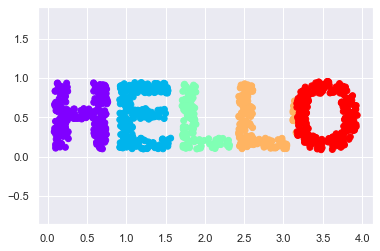

In [11]:

X = make_hello(1000)
colorize = dict(c=X[:,0], cmap=plt.cm.get_cmap('rainbow',5))

plt.scatter(X[:,0],X[:,1],**colorize)
plt.axis('equal');

In [12]:
#추출해서 5개의 칼라값으로 표현이 된다 

(1000, 2)
<class 'list'>


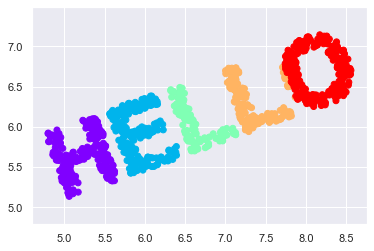

In [18]:
# 돌려보겠다
print(X.shape)
def rotate(X, angle):  
    theta = np.deg2rad(angle)  # 라디안=호의길이로 바꿔줘야한다. 
    R = [[np.cos(theta), np.sin(theta)],  
        [-np.sin(theta), np.cos(theta)]] # (2차원에서 행렬회전) -> 
    print(type(R))
    return np.dot(X,R)      # X 에는 1000x2 의 데이터가 들어와있다 R 은 2x2 이므로 결과값은 1000x2 이다.
X2= rotate(X, 20) + 5   # +5 를 준 이유는?? 그 자리에서 돌아가면 밑이 잘려서 조금 올려둔 것이다
plt.scatter(X2[:,0],X2[:,1],**colorize)
plt.axis("equal");

(1000, 1000)


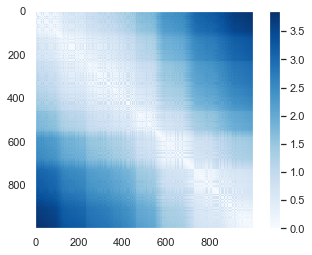

In [21]:
# 각 점들간의 상호거리  (점사이의 거리값을 구해보자)
from sklearn.metrics import pairwise_distances  # 디폴트가 유클리디안 거리이다. (=피타고라스정리의 길이다)
D= pairwise_distances(X)   # 거리값도 거리행렬이다  
print(D.shape)            # (거리행렬의 차수가 1000x1000 이다 )
D[:5,:5]

# 임의로 찍어서 시각화해보자
plt.imshow(D,zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

In [22]:
D2=pairwise_distances(X2)
np.allclose(D,D2)     # 원형을 유지하고 있음 (돌아가고는 있지만 원형을 유지한다는 뜻)

True

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


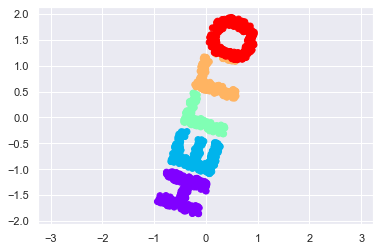

In [23]:
# 차원축소하는 것을 보자
from sklearn.manifold import MDS  # manifold (다형체 : 하나의 모양을 여러개로 표현한다)
model = MDS(n_components=2, dissimilarity = 'precomputed',  # precomputed-> 미리계산된 거리행렬이 필요하다는 뜻
           random_state=1)                                  # 즉 미리계산된 거리행렬을 이용해 차원을 축소한다 
out= model.fit_transform(D) # fit_transform 에 집어넣는 것은 D 이다 
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal');
print(out) # 결과값보면 차원축소해도 원래모양유지하고, 뒤집힌 것을 확인했다 -> 모양 비슷한 것을 확인할 수 있었다

In [30]:
# 고유 값 분해를 보자
import numpy as np
rng = np.random.RandomState(10) # seed 값 -> 랜덤을 어디서 시작하느냐 를 말하는 것
C = rng.randn(3,3)   # 3x3 의 정규분포 행렬을 만든다 
print(np.dot(C,C.T)) # T 를 쓰면서 전치시켰음 ->  전치해서 곱한다 -> 즉 .dot(C,C.T) 는 행렬의 거듭제곱을 의미한다 -> 행렬의 거듭제곱을 하면 정뱡행렬이면서 대칭행렬이 나온다 
e, V = np.linalg.eigh(np.dot(C,C.T))  # 정방행렬이면서 대칭행렬에 고유값 분해를 했다 
print('eigenvector',V) # 이것은 고유벡터
print("eigenvalue",e)# 이것은 고유값   -> [0.02629875 0.37332691 5.26033253] 


# 두벡터가 내적하는지 확인 함으로써 고유벡터가 정직교하는지 보자
np.dot(V[1], V[2]) #거의 0이다- > 직교한다 (고유벡터들은 정직교하는게 맞는것을 확인했다) 

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

In [35]:
  # (아까 글씨가 2차원에 있었는데 )  2차원의 데이터를 3차원으로 변환하는 것 
def random_projection(X, dimension=3, rseed=42):  # MDS 는 랜덤이므로 분석용으로는 못쓴다 시각화로만 쓴다 , 매개변수3개줌
    assert dimension >= X.shape[1]  # shape 하면 2차원인경우 행, 열 값이 출력된다. 1이라했으니 열이다 -->  assert 문 통해 차원확대만 가능!
    rng = np.random.RandomState(rseed)
    C= rng.randn(dimension, dimension)  # 3x3 으로 데이터가 만들어진다 
    print("C는", C.shape)           
    print(np.dot(C,C.T)) # 제곱하니까 정방행렬이면서 대칭행렬인 행렬이 만들어진다 
    e, V = np.linalg.eigh(np.dot(C, C.T)) # eigh 를 통해 고유값 분해를 했다, (고유치와 고유벡터가 나오고 고유벡터는 정직교한다 ) 
    print("V는", V.shape)  # V.shape 하게 되면 3x3 이다.
    print('차원은', V[:X.shape[1]]) #2 차원이나올것이다 (X.shape[1]는 2니까 = 원래데이터 2차원이였으니까)
    return np.dot(X, V[:X.shape[1]])  # 3x3 인데 2x3 으로 바꾸라는 것!!
print(X.shape) 
print(X.shape[1])
print("데이터 차원은", X.shape)
X3=random_projection(X,3)
X3.shape # X3 는 3차원으로 간것이다 (1000x3) 이니까 


(1000, 2)
2
데이터 차원은 (1000, 2)
C는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

In [ ]:
#결론 :  원래ㅔ 데이터가 1000X2 인데 3차원으로 만들고싶다   2x3 을 곱한다 (그럼 3차원으로 갈 수 있다)  ==차원확장

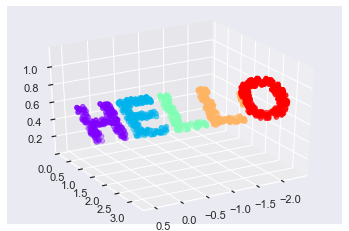

In [36]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:,0],X3[:,1],X3[:,2], **colorize)
ax.view_init(azim=60,elev=30)  # ax.view_init 은 각도를 조절하는 것이다 (azim 를 통해서 좌우로  60도 elev 상하로 30도 올라간다는 의미 ) == 3차원에서 카메라의 각도

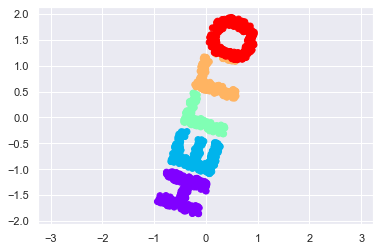

In [38]:
model =MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0],out3[:,1], **colorize)
plt.axis('equal');  # mDS 는 선형변화에 강하다

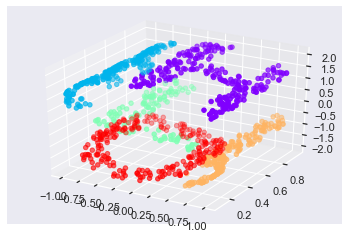

In [43]:
def make_hello_s_curve(X):
    t=(X[:,0] -2 ) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:,1]
    z= np.sign(t) * (np.cos(t) -1)
    return np.vstack((x,y,z)).T

XS= make_hello_s_curve(X)
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:,0],XS[:,1],XS[:,2], ** colorize); # MDS 는 선형에 강하지만 비선형에 취악하다는 것을 확인할수있다 
#                                                     그림을 보면 둥그렇게 돌아가있다 

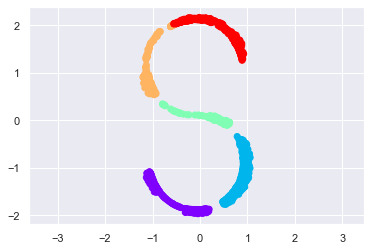

In [45]:
# 모양 유지가 안된다  \---> 즉 MDS 는 비선형에서 모양유지가 안된다 -> 그래서 나오는 것이 LLE
model =MDS(n_components=2, random_state=1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:,0],out3[:,1], **colorize)
plt.axis('equal'); 

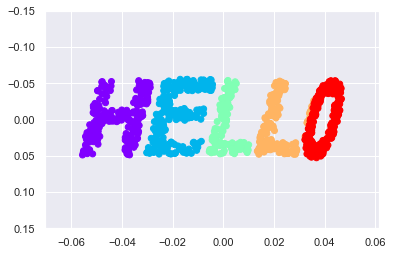

In [49]:
#LLE ( locally linear embedding ) 
# 이건 비선형에 강하다 
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense') # 가까운데이터100개를 확인해서 2차원으로 차원축소한다 
out = model.fit_transform(XS)
fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], ** colorize)
ax.set_ylim(0.15, -0.15);                              # 데이터가 나오면 시각화하려고 노력해보자!

In [70]:
# 4차원 변수가 4개인 iris를 차원축소시키는것
import os# 디렉터리 관리하려고 호출
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.manifold import MDS
from sklearn import manifold  # 다형체 모형을 사용하기 위해서 호출
from sklearn.manifold import MDS  
from mpl_toolkits import mplot3d # 3차원 출력하려고 호출


CHART_DIR='./'  

colors = ['r','g','b']
markers=['o',6,'*']
def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white')
    mds = MDS(n_components=3)                                       # 변수 4->3  (시각화할땐 3차원, 2차원으로 표현)  
    Xtrans = mds.fit_transform(X)                                   # 150 X 3
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15)         # 카메라 각도를 조절 

    mds = MDS(n_components=2)
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight") 

C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 5089

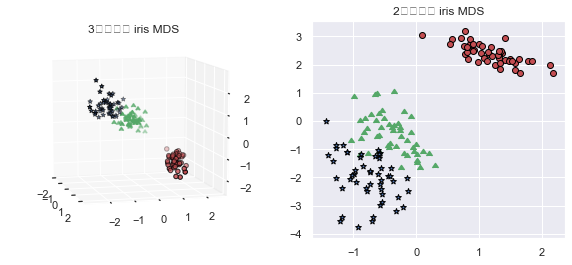

In [72]:
plot_iris_mds()

In [ ]:
# 데이터 형태가 어떤지 구분이 된다   

In [ ]:
# kmeans 하는 일  1. 군집분석을 통해서  -> 종속변수 결정,  
#                 2  팔레트를 압축하고, 실제데이터에 팔레트 번호를 넣는다  ->   1바이트로 표현이 가능해진다
#                 3. 원형 이상치 제거
#                 4. 챗봇 같은 곳에서 미리 군집화를 해서 문제해결에 도움을 준다 

In [ ]:
# 알고리즘 : k값을 결정해야하고 ( 군집수) ,  중심값을 결정해야 한다. 

# 알지도 못하는 데  군집수를 정하고 중심값을 정하는것이 아이러니다
# 문제점 : 이상치에 민감하다 

# kmeans 의 척도 는 '거리값' 이다.  거리값은 피타고라스 정리를 이용해서 구한다 (유클리디언거리= 피타고라스정리에 의해 구해진 거리값)

In [ ]:
# kmeans 의 문제점을 해결하기 위해서 쓰는것이 DBSCAN 이다
# DBSCAN : eps 라는 기본거리값과  군집이 되기 위한 최소요소수 를 줘서 근거리에 있는 것들끼리 서로 군집을 만들어간다 
#       핵심값, 경계값, 어느군집에도 속하지 않는것 3가지로 나뉜다.   (DBSCAN 하면 군집수를 주지않아도 3가지를 구해줌)


# kmeans 의 문제점이 있어서 DBSCAN 이 생겼으나 많이 쓰는것은 kmeans 다 !

In [78]:
import scipy
import sklearn.metrics.pairwise

a_64= np.array([61,22,71.60,  -65.755], dtype = np.float64)
b_64= np.array([61,22,71.608,  -65.72], dtype = np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
# norm 은 원점으로 부터의 크기 이다 (따라서 단일벡터이다)   두개의 차를 알고싶으면 아래처럼 빼줘야한다.
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype=np.float64)
dist_32_np = np.array([np.linalg.norm(a_32 - b_32)], dtype = np.float32)


dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_32])  #2개의 벡터간에 거리를 구하기 위해서 값을 2개를 넣어줬다
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_32], metric='manhattan') # 기본은 유클라디언 거리인데 이건 맨하탄 거리이다  
  # 코사인거리도 있다
    
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
# 거리값은 피타고라스 정리에 의해 만들어진다 는 것을 이해하자! 
# 거리값을 구하는 이유는 무엇인가? 가까운 놈인지 멀리있는 놈인지 알기위해서 구하는 것이다

In [82]:
from sklearn.svm import SVC      #  svc 의 c 는 classificition , 즉 분류를 위한 suppport vector machine!!
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  # 전처리  ( kmeans, PCA 는 전처리에 민감하다 )  -> 전처리 안하면 사이즈큰 놈이 중요한 변수가 되어버림 ->전처리필수!(그니까 반드시 scaling 해주자)!
cancer =load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
                    cancer.data, cancer.target, random_state=0)

scaler = MinMaxScaler().fit(X_train)  # 이렇게 연결하는 것을 chaining 이라고 한다!!
X_train_scaled = scaler.transform(X_train)  
svm = SVC()
svm.fit(X_train_scaled, y_train) 
X_test_scaled = scaler.transform(X_test)  # 테스트데이터도 해준다!! 
print("테스트 점수: {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수: 0.95


C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [94]:
# 격자 : 그물망 처럼 만든다 

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], # 이걸 x축으로
             'gamma':[0.001, 0.01,0.1,1,10,100]}  # 이걸 y 축으로 둔다 이걸기준으로 격자를 만드니까 36개의 조합이 만들어진다 . 
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))  
print('테스트 점수:{:.2f}'.format(grid.score(X_test_scaled, y_test)))

print("최적의 매개변수:", grid.best_params_)

# 이렇게 별도로 하는 것보다 pipeline 을 쓰는 것이 편리

최상의 교차 검증 정확도 : 0.98
테스트 점수:0.97
최적의 매개변수: {'C': 1, 'gamma': 1}


In [95]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC())]) # 파이프라인에 이름을 주는 이유는? 참조하기 위해서 (=parameter 을 전달하기 위해서)
pipe.fit(X_train, y_train)
print('테스트 점수: {:.2f}'.format(pipe.score(X_test, y_test)))  # 파이프

테스트 점수: 0.95


C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [98]:
#pipeline+GridSearchCV  는 다양한 테스트 문제를 해결해준다 (케라스에서 많이쓴다 ) 

from sklearn.model_selection import GridSearchCV
# regularization   ?  규제   (과적합 방지하는데 쓴다) 

param_grid = {'svm__C':[0.001, 0.01, 0.1, 1, 10, 100],  # 범위를  처음에는 대충준다. 만약에 0.01 로 결정되면 그 이후로 세부적으로 들어감
             'svm__gamma':[0.001, 0.01,0.1,1,10,100]} 

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)  #pipe 로 바꿔줬음 
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도 : {:.2f}".format(grid.best_score_))  
print('테스트 점수:{:.2f}'.format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수:", grid.best_params_)


최상의 교차 검증 정확도 : 0.98
테스트 점수:0.97
최적의 매개변수: {'svm__C': 1, 'svm__gamma': 1}


In [ ]:
##kmeans 예를 보자

array([[4.76666667, 2.89166667],
       [6.86904762, 3.09285714],
       [5.1875    , 3.6375    ],
       [5.91538462, 2.74807692]])

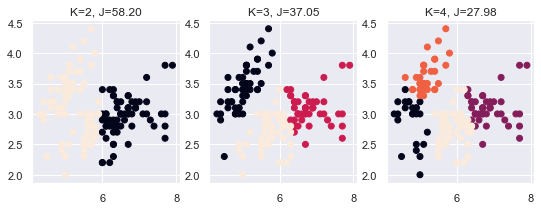

In [107]:

from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris()
X =iris.data[:,:2] # 원래전체변수는 4개인데 2개로 줄여서 쓰겠다 2개의 값만 이용해서 군집화해볼것이다

y_iris = iris.target
km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9,3)); plt.subplot(131)
plt.scatter(X[:,0], X[:,1], c=km2.labels_)  # 칼라값 2개(kmeans 의 결과 2개의 군집으로 나누라했으니까 레이블도 0아니면 1로 2개이다.) 레이블값을 이용해서 색을 주고 있는 것이다 
plt.title('K=2, J=%.2f' % km2.inertia_)  # inertia_ 는 군집내부거리값이다  
#labels_ : 군집번호이다

plt.subplot(132) ; plt.scatter(X[:,0], X[:,1], c=km3.labels_)  # 칼라값3개
plt.title('K=3, J=%.2f' % km3.inertia_)

plt.subplot(133) ; plt.scatter(X[:,0], X[:,1], c=km4.labels_)
plt.title("K=4, J=%.2f" % km4.inertia_) 

#중심값출력하고싶으면 아래처럼쓴다
km4.cluster_centers_ #4개 출력된다 


# 초기중심값이 결정됐다 -> 그러나 중심은 지속적으로 변화된다 
# 중심과의 거리값 이 중요하다 멀리떨어져있는지 아닌지 볼 수 있기 때문이다 



In [ ]:
#

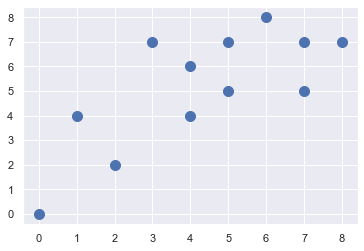

In [111]:
X=np.array([[7,5], [5,7], [7,7],[4,4],[4,6],[1,4],
            [0,0], [2,2],[8,7],[6,8],[5,5],[3,7]]) #12 x2 이다. 

plt.scatter(X[:,0],X[:,1],s=100)

plt.show()

label 개수 12


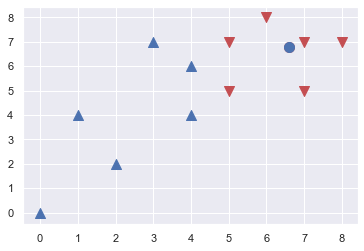

In [119]:
# 위의 데이터에서  kmeans 를 해보자
# 레이블 즉 군집번호는 12개가 나올 것이다 ( 관측치별로 군집번호가 나와야하기때문이다 ) -> 그래야 종속변수를 결정할 수 있다 
# 중심점 = 2개 

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, init='random', n_init=1, max_iter=1, 
              random_state=1).fit(X)
c0, c1 = model.cluster_centers_  # center 점을 여기서 받아뒀다

print('label 개수', len(model.labels_))

                # boolean index 
plt.scatter(X[model.labels_ ==0,0], X[model.labels_==0,1], s=100, marker='v',c='r')
plt.scatter(X[model.labels_ ==1,0], X[model.labels_==1,1], s=100, marker='^',c='b')
plt.scatter(c0[0],c0[1], s=100, c='r')  # 그럴듯하게 중심이 잡히는 것을 확인할수있다 
plt.scatter(c0[0],c0[1], s=100, c='b')
plt.show()




In [120]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [121]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(
fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [140]:
n_colors = 64 # 8로 바꿔봐라  (8개의 색으로 표현) 
china = load_sample_image('flower.jpg') # 싸이키트가 제공하는 이미지 -> 이미지는 숫자로 되어있다 
# 1바이트 = 8비트 = 표현종류 -> 256컬러 

china = np.array(china, dtype=np.float64)/ 255 # 255로 나눈것은 컬러값 정규화를 하기 위해서다 (0에서 1사이의 값으로 정규화 함) 

# 컬러값 정규화하는 방법: array 로 정렬하고 255로 나눈다. 

In [141]:
w, h, d = original_shape = tuple(china.shape)  # shape 는 지금까지 2개가 나왔는데 왜 3개가 받고있나?  
                                            #이미지 사이즈가 행과 열로 있고, 그 칼라값까지해서 총 3개이다 
print(w, h, d)  # 427x640 의 이미지 사이즈를 가지고 있고, 칼라값은 3이 나온다 ()
assert d ==3 # d 가 3이므로 RGB 만 들어와라!! 라는 것 
image_array = np.reshape(china, (w*h,d))  # 2차원으로 변화시킨 것이다 

427 640 3


In [142]:
image_array_sample = shuffle(image_array, random_state=0)[:1000] # shuffle ; 섞어라  ->> 1000개의 행이 나온다 
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample) # 1000개의 행으로 fitting 한다.
# n_colors 가 64개 컬러였다. 64개 컬러로 그룹핑(군집화)한다. 64개의 중심을 만들어서 같은 것끼리 묶는다. 
# 그ㅜ래서 이제 칼라값 이름 대신 0~63의 숫자를 이용할 것이다. 

In [143]:
labels= kmeans.predict(image_array)  # 라벨 427x640

In [144]:
 # 레이블 번호를 해당하는 codebook 컬러로 대칭시켜보자 
    #(지금까지 위에서는 64개로 군집화를 시켜둔것이고, 여기 함수에서는 그 군집화된 숫자를 진짜 색깔로 매칭시킨것이라고 생각하자)
    
def recreate_image(codebook,labels, w,h):  # a매개변수로 codebook (64컬러값을 의미), labels ( 이미지픽셀수), w,h 는 사이즈 
    d=codebook.shape[1]      # codebook : 64개의 중심값을 말한다.  -> 64개의 중심값을 잡았고, RGB 3개니까 -> 64x3  (위에서 있던색을 중심값으로 잡았었는데 실제론 rgb 3개니까 그걸 다시 풀어놓는다고 생각하면 된다)
    image = np.zeros((w,h,d)) # 원래이미지 사이즈다 
    label_idx = 0      
    for i in range(w):   
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]] # 인덱스값을 가지고 코드북의 칼라값을 가져오겠다 64개중 하나를 가져온다
            label_idx += 1
    return image

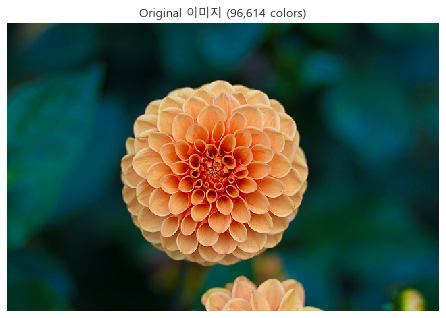

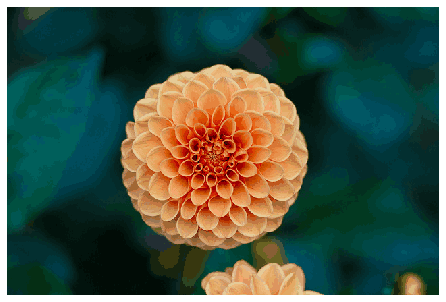

In [145]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96,614 colors)')
plt.imshow(china)
plt.figure(2)
plt.clf()
ax=plt.axes([0,0,1,1])
plt.axis('off')

# 64개의 컬러로 찍은 것이다
plt.imshow(recreate_image(kmeans.cluster_centers_, labels,w,h))

# 위는 원본이미지 인데 아래는 64개의 컬러값을 이용해서 찍은 것이다 ( 압축한 것 ) 
# 압축한 것을 

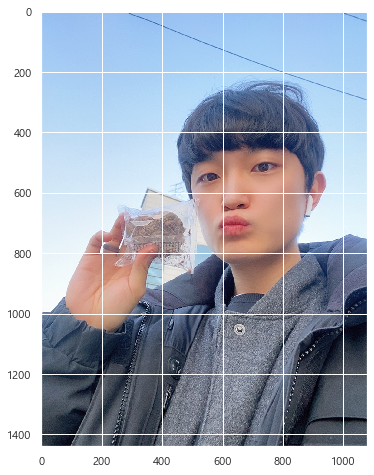

In [146]:
image = plt.imread('bear.jpg')
plt.figure(figsize = (15,8))
plt.imshow(image)

In [147]:
image.shape   # 이미지 사이즈 확인 

(1440, 1080, 3)

In [148]:
# 전체바이트수알고싶으면 3개 곱하기 
image.shape[0] * image.shape[1] * image.shape[2]


4665600

In [150]:
x,y,z = image.shape
image = np.array(image, dtype = np.float64) / 255
image_2d = image.reshape(x*y , z)  # kmeans 로 하는데 왜 차수를 줄여주나? (kmeans 는 3차원을 이해하지 못하기때문이다)
image_2d.shape

(1555200, 3)

In [152]:
# 컬러를 16개로 cluster 해준다 --> 따라서 (중심값이 16개)
kmeans_cluster = cluster.KMeans(n_clusters=16)
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[0.29304981, 0.32930117, 0.39940486],
       [0.69698207, 0.84001644, 0.96467106],
       [0.67073052, 0.4755965 , 0.43525932],
       [0.04750161, 0.07038625, 0.13837551],
       [0.54185606, 0.57314164, 0.64904284],
       [0.89600976, 0.94848318, 0.97856055],
       [0.22073998, 0.25618363, 0.32589782],
       [0.43917096, 0.47824673, 0.56541376],
       [0.729434  , 0.70386146, 0.73883865],
       [0.84302648, 0.64277353, 0.58029925],
       [0.52486063, 0.3691051 , 0.36393784],
       [0.62465463, 0.78292759, 0.95208871],
       [0.12588113, 0.16657931, 0.24721326],
       [0.77291172, 0.56755108, 0.49791176],
       [0.35500861, 0.39715188, 0.48487387],
       [0.80350057, 0.88765185, 0.9572723 ]])

In [153]:
len(cluster_centers)  

16

In [154]:
cluster_centers.shape  #16x3

(16, 3)

In [ ]:
#lable 은 몇개를 만들어야하나?   image.shape[0] * image.shape[1] 이 만들어져야한다.

In [155]:
cluster_labels= kmeans_cluster.labels_
cluster_labels

array([11, 11, 11, ...,  0, 14,  0])

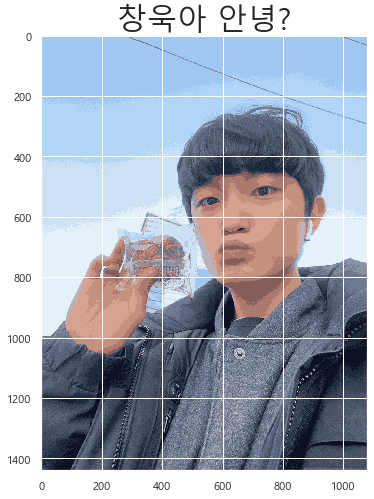

In [159]:
plt.figure(figsize=(15,8))
plt.title('창욱아 안녕?',size=30)
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

In [ ]:
# 원형 이상치 제거

In [165]:
from sklearn.datasets import make_blobs 
X, label =make_blobs(100, centers =1)  # 중심이 1개인 데이터 100개 만들었다 

In [166]:
kmeans= KMeans(n_clusters=1)  # cluster 도 1개(중심1개)
kmeans.fit(X)# 피팅
distances =kmeans.transform(X) #kmeans 하고 transform 하면 --> '각 데이터의 중심으로부터의 거리값'으로 변환된다 !! 
# 거리값이 쭉 있을텐데 뭐가 큰지 인덱스를 정렬해야함
#ravel()  1차원
sorted_idx = np.argsort(distances.ravel())[::-1][:5]   # argsort : 인덱스를 sort 해라 (값을 보고 인덱스를 소트하라)  ?????  #::-1 의 의미 : 내림차순으로 변경하고 그 중에 5개만! 


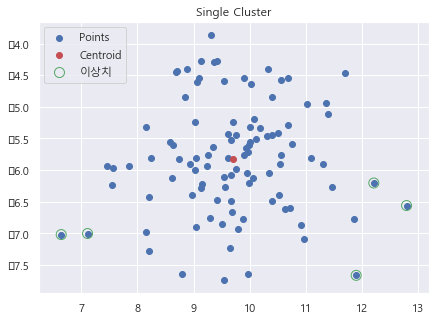

In [168]:
f, ax = plt.subplots(figsize=(7,5))   
ax.set_title('Single Cluster')
ax.scatter(X[:,0],X[:,1], label = 'Points')
ax.scatter(kmeans.cluster_centers_[:,0],  
          kmeans.cluster_centers_[:,1],
          label='Centroid', color='r')
ax.scatter(X[sorted_idx][:,0],
          X[sorted_idx][:,1],  
          label='이상치', edgecolors='g',
          facecolors='none', s=100)
ax.legend(loc='best')

In [ ]:
#PCA 를 해보자!! 
# PCA: principle component analysis = 주성분분석
# 모델 입력 전단게에서 특징 추출( noise 제거)
# PCA 의 결과를 모델의 변수로 추가하면 정확도 상승

In [170]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1,-1], [-2,-1],[-3,-2],[1,1],[2,1],[3,2]])  # 관측스6개, 변수2개
pca = PCA(n_components=2)# 주성분을 2개로 하라.여기서는 2개니까 2개 전부 해라
pca.fit(X)
print(pca.explained_variance_ratio_)  # 설명력

[0.99244289 0.00755711]


In [172]:
# 차원축소후에 분석을 하면 좋은점?? 
## 1. noise 제거된다
## 2. 속도가 개선된다
## 3. 차원의 저주 ( 변수가 많으면 문제가 해결이 안된다 ) 
print(pca.explained_variance_)  # 분산 출력 : 분산이 큰 것이 주성분이다((1등))
print(pca.noise_variance_)

[7.93954312 0.06045688]
0.0


In [174]:
pca = PCA(n_components=2, svd_solver = 'full') 
# singular value decomposition =svd 는 희소행렬의 특징을 추출할때 쓰인다 비정방행렬인 경우에도 사용

# full 이면 전체를 고려하겠다/ randomized : 사이즈가 클때는 randomized 를 해줘야한다. (다계산못하니까)/ arpack: 희소행렬인경우 0을 제거하고 출력
#사이즈가 500x500 이상이면 randomized 쓰는 것이 좋다 
 

pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [176]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=1)
print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_test.shape)


['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(143, 30)


In [177]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도 : 0.62


C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [178]:
# 스케일링을 해보자
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =scaler.transform(X_test)

In [180]:
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도 : {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도 : 0.97


C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
# 차이가 많이 난다 스케일링 하는게 중요한 것을 알 수 있다!! ( pca 도 스케일링의 영향을 많이 받는다!))

In [185]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)
#여기에 pca 를 해보겠다

In [187]:
pca = PCA(n_components =2 )
pca.fit(X_scaled)
## 2개의 주성분을 출력
X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 :{}".format(str(X_pca.shape))) # 나머지 28개는 버렸다 

[0.44272026 0.18971182]
원본 데이터 형태 : (569, 30)
축소된 데이터 형태 :(569, 2)


[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
원본 데이터 형태 : (569, 30)
축소된 데이터 형태 :(569, 30)


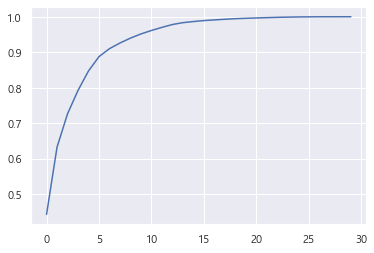

In [188]:
# 다시30개로 바꾸고
pca = PCA(n_components =30)
pca.fit(X_scaled)
## 2개의 주성분을 출력
X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 :{}".format(str(X_pca.shape))) 
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # 우상향하는 곡선이 그려지고 어느순간부터 수평하는 느낌으로 그려진다 -->#elbow 를 시각적으로 확인

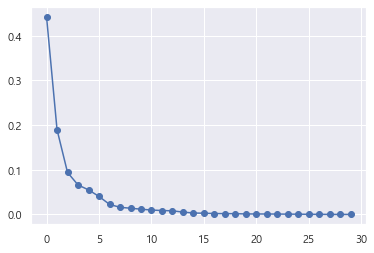

In [190]:
plt.plot(pca.explained_variance_ratio_, 'bo-')  

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  # 맨처음 정규화를 해줬다. (Z 점수 정규화)
scaler.fit(X_train)         
X_train_scaled = scaler.transform(X_train) # transform 을 이용해서 적용하고
X_test_scaled = scaler.transform(X_test)
from sklearn.decomposition import PCA       # 주성분분석해보자!!
pca = PCA(n_components =6)  # 전체 변수 30개    
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 정확도 : {:.2f}".format(svm.score(X_t_test, y_test)))

# 6개: 92% ,  9개: 94%,  15개 : 94%   ,  20개 : 95% ,  30개 :  97%   ---> 3프로때문에 변수 15개를 더 쓸필요는 없다! 가성비가 낮다 ( 9개일때가 좋겠다 라고 결론 지음)

SVM 테스트 정확도 : 0.92


C:\Users\ICT01_09\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [199]:
print("PCA 주성분 형태 : {}".format(pca.components_.shape))

# 6, 30 이 나온다 (30은 전체변수수와 같다 ,-===> 주성분을 30개의 변수가 설명하고 있다는 뜻이다 )  
# 30개의 변수 모두가 조금씩조금씩 영향을 미쳐서 만든 6개의 축(=주성분축)인 것이다 
# 주성분축을 '변수의 기여도' 에 따라 명명을 해주어야한다. 

PCA 주성분 형태 : (6, 30)


In [200]:
print("PCA 주성분 : {}".format(pca.components_))  # 6개의 값이 출력이 된다. 

# 첫번째 봤을때 9.2 가장크고 그다음 4.4 .. 임
# 

PCA 주성분 : [[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.09276647e-01  2.71509521e-

C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_09\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


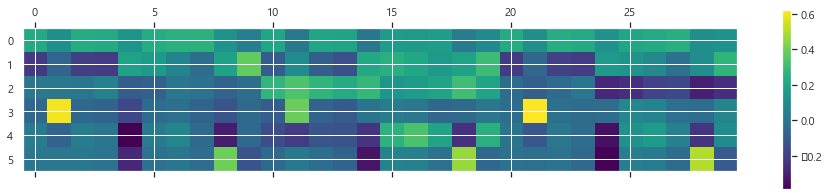

In [202]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()

In [ ]:
# 노란 것 2개가 큰 영향을 미치고 있다고 보면 된다 

(87, 65)


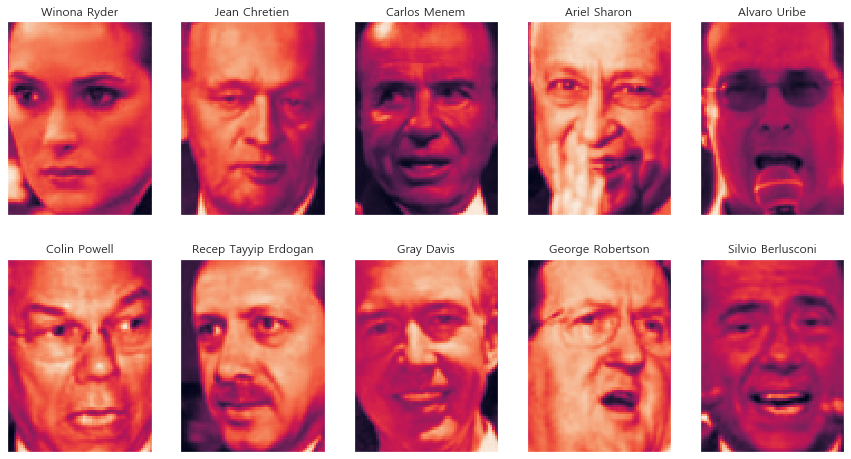

In [224]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people # fetch_lfw_people  : 사람얼굴을 다운받을 수 있는 함수
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) # min_faces_per_person : 적어도 20장정도 비슷한 얼굴이 있는 사람 것을 다운받는다 
image_shape = people.images[0].shape
print(image_shape) # (87, 65) 가 나온다  -> 이미지를 읽을땐 가로65, 세로는 87    / 행렬을 읽을떄는 행, 열 순으로 읽는다
fig, axes = plt.subplots(2,5,figsize = (15,8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images,
                            axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [225]:
print("이미지사이즈 :{}".format(people.images.shape))
print("클래스 개수: {}".format(len(people.target_names)))

이미지사이즈 :(3023, 87, 65)
클래스 개수: 62


In [226]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_poeple = X_people/255.

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X_people,y_people,stratify=y_people, random_state=0)

In [228]:
# 여기에 pca 를 실행해보자!
from sklearn.decomposition import PCA
pca = PCA(n_components = 100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

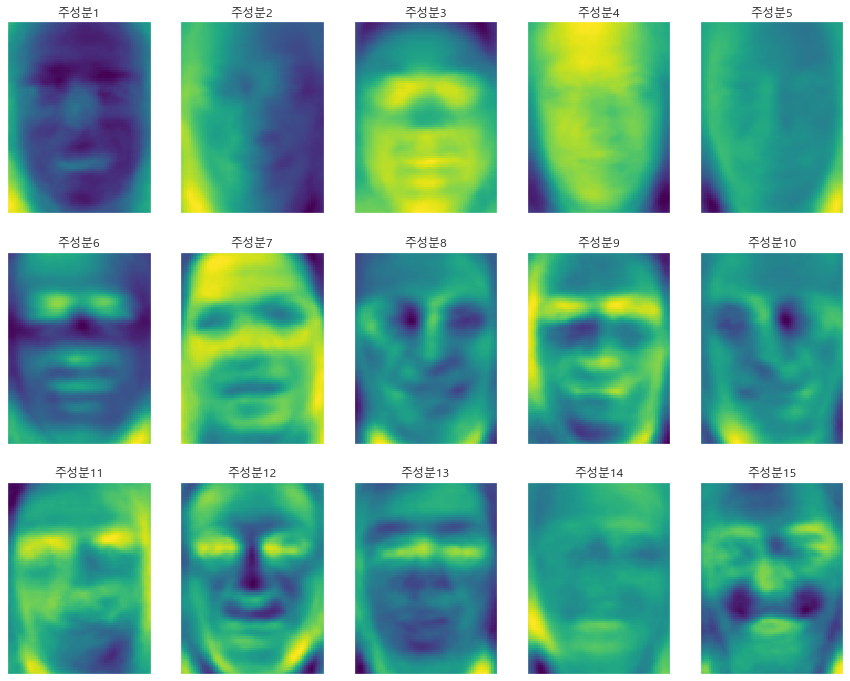

In [229]:
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks' : (), 'yticks' : ()})
for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분{}".format((i+1)))

In [ ]:
# 알수없는 얼굴이 컴퓨터가  찾아낸 주성분이다  ( 컴퓨터가 주성분분석을 통해 찾아낸 주성분이다)
# 100개를 합하여 출력하면 원본이미지랑 비슷해진다( 원본이미지를 복원 ) -> ANN 의 가중치 특징도        ???